In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

REPORTS_DIR = Path("../reports")
REPORTS_DIR.mkdir(exist_ok=True, parents=True)


In [3]:
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

print("Shape:", X.shape)  
X.head()


Shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
PCs = pca.fit_transform(X_scaled)
expl = pca.explained_variance_ratio_

pc_df = pd.DataFrame(PCs, columns=["PC1","PC2"])
pc_df["label"] = y
expl


array([0.44272026, 0.18971182])

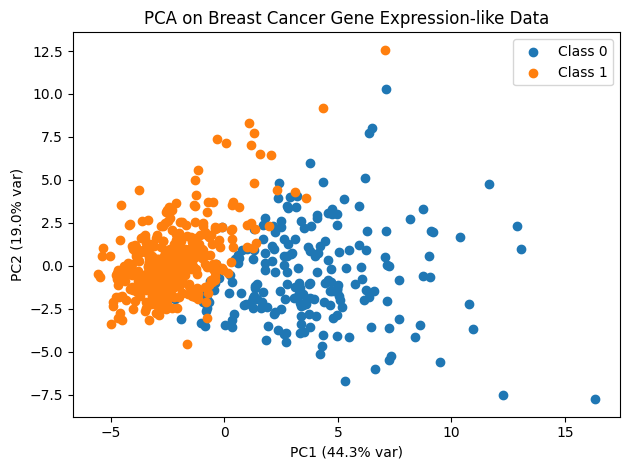

In [5]:
plt.figure()
for label, sub in pc_df.groupby("label"):
    plt.scatter(sub["PC1"], sub["PC2"], label=f"Class {label}")
plt.legend()
plt.xlabel(f"PC1 ({expl[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({expl[1]*100:.1f}% var)")
plt.title("PCA on Breast Cancer Gene Expression-like Data")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "omics_pca.png", dpi=150)
plt.show()


In [6]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
sil = silhouette_score(X_scaled, labels)

pc_df["kmeans_label"] = labels
print("Silhouette score:", sil)


Silhouette score: 0.34338224069077805


In [7]:
pc_df.to_csv(REPORTS_DIR / "omics_pca_scores.csv", index=False)

summary = f"""# Omics PCA — Gene Expression (Breast Cancer dataset)

- Samples: {X.shape[0]}, Features: {X.shape[1]}
- PCA variance explained: PC1={expl[0]*100:.1f}%, PC2={expl[1]*100:.1f}%
- k-means clustering silhouette score: {sil:.3f}

Artifacts saved:
- reports/omics_pca.png
- reports/omics_pca_scores.csv
"""
(REPORTS_DIR / "omics_summary.md").write_text(summary)
summary


'# Omics PCA — Gene Expression (Breast Cancer dataset)\n\n- Samples: 569, Features: 30\n- PCA variance explained: PC1=44.3%, PC2=19.0%\n- k-means clustering silhouette score: 0.343\n\nArtifacts saved:\n- reports/omics_pca.png\n- reports/omics_pca_scores.csv\n'